Widya Anastasya | anastasyawidya14@gmail.com

# MACHINE LEARNING MODEL

In [ ]:
#BY WIDYA ANASTASYA

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import array
from numpy import argmax

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
#Import data from Google drive
data_final = pd.read_csv('/content/drive/My Drive/Project/Studi_Independen/Testing/data_fixi.csv')



In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25612 entries, 0 to 25611
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_customer          25612 non-null  int64  
 1   JK                   25612 non-null  object 
 2   KepemilikanMobil     25612 non-null  object 
 3   KepemilikanProperti  25612 non-null  object 
 4   JmlAnak              25612 non-null  int64  
 5   Pendapatan           25612 non-null  float64
 6   TipePendapatan       25612 non-null  object 
 7   TingkatPendidikan    25612 non-null  object 
 8   StatusKeluarga       25612 non-null  object 
 9   TipeRumah            25612 non-null  object 
 10  FlagWorkPhone        25612 non-null  int64  
 11  FlagPhone            25612 non-null  int64  
 12  Pekerjaan            25612 non-null  object 
 13  JmlAnggotaKeluarga   25612 non-null  int64  
 14  Age                  25612 non-null  int64  
 15  Experience           25612 non-null 

In [ ]:
data_final.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,0,1,Sales staff,1,52,8,0
1,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,0,1,Sales staff,1,52,8,0
2,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,0,1,Sales staff,1,52,8,0
3,5008825,Perempuan,Ya,Tidak,0,130500.0,Bekerja,G,M,MH,0,0,Accountants,2,29,3,1
4,5008825,Perempuan,Ya,Tidak,0,130500.0,Bekerja,G,M,MH,0,0,Accountants,2,29,3,0


In [ ]:
#Changing the data type to category
cols=data_final.select_dtypes(exclude='int').columns.to_list()
data_final[cols]=data_final[cols].astype('category')

In [ ]:
print(data_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25612 entries, 0 to 25611
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id_customer          25612 non-null  int64   
 1   JK                   25612 non-null  category
 2   KepemilikanMobil     25612 non-null  category
 3   KepemilikanProperti  25612 non-null  category
 4   JmlAnak              25612 non-null  int64   
 5   Pendapatan           25612 non-null  category
 6   TipePendapatan       25612 non-null  category
 7   TingkatPendidikan    25612 non-null  category
 8   StatusKeluarga       25612 non-null  category
 9   TipeRumah            25612 non-null  category
 10  FlagWorkPhone        25612 non-null  int64   
 11  FlagPhone            25612 non-null  int64   
 12  Pekerjaan            25612 non-null  category
 13  JmlAnggotaKeluarga   25612 non-null  int64   
 14  Age                  25612 non-null  int64   
 15  Experience         

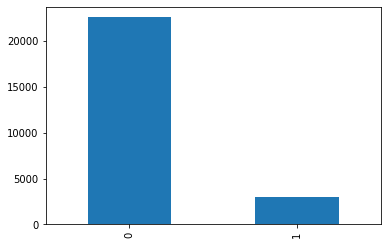

In [ ]:
data_final['Overdue'].value_counts().plot(kind = 'bar')

## Feature Selection

In [ ]:
remove_cols = data_final.columns.to_list()
#remove_cols.remove(remove_cols[0])
remove_cols.remove('Overdue')

In [ ]:
y = data_final['Overdue']
X = data_final[remove_cols]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assigning numerical values and storing in another column
X = X.apply(LabelEncoder().fit_transform)
X

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,1,1,0,1,0,124,0,0,2,1,0,1,14,0,31,8
1,2,1,0,1,0,124,0,0,2,1,0,1,14,0,31,8
2,3,1,0,1,0,124,0,0,2,1,0,1,14,0,31,8
3,10,1,1,0,0,53,1,0,1,1,0,0,0,1,8,3
4,10,1,1,0,0,53,1,0,1,1,0,0,0,1,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25607,21980,0,1,0,1,158,1,1,1,1,0,1,3,2,6,1
25608,21980,0,1,0,1,158,1,1,1,1,0,1,3,2,6,1
25609,22351,0,1,1,0,134,1,0,1,1,0,0,10,1,27,7
25610,22552,0,0,1,0,37,1,0,2,4,0,0,8,0,4,3


In [ ]:
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,stratify=y, test_size=0.3,random_state=11)

In [ ]:
y.value_counts()

0    22577
1     3035
Name: Overdue, dtype: int64

In [ ]:
X_balance,y_balance = SMOTE().fit_resample(X,y)
X_balance = pd.DataFrame(X_balance, columns = X.columns)

In [ ]:
y_balance.value_counts()

0    22577
1    22577
Name: Overdue, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balance,y_balance,stratify=y_balance, test_size=0.3,random_state = 11)

## Modeling

### Decision Tree Classifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)

print('Accuracy : {n}'.format(n=accuracy_score(y_test, y_predict)))
print('F1 Score : {n}'.format(n=f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy : 0.8087399424226767
F1 Score : 0.8091625543198055
      0     1
0  5463  1310
1  1281  5493


### KNeighbor Classifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print('Accuracy : {n}'.format(n=accuracy_score(y_test, y_predict)))
print('F1 Score : {n}'.format(n=f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy : 0.7791392928323614
F1 Score : 0.7932273669661369
      0     1
0  4816  1957
1  1035  5739


### XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_predict = xgb.predict(X_test)

print('Accuracy : {n}'.format(n=accuracy_score(y_test, y_predict)))
print('F1 Score : {n}'.format(n=f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy : 0.7295342142171699
F1 Score : 0.7171530029334567
      0     1
0  5238  1535
1  2129  4645


## Modeling Evaluation

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=None)

acc_score_knn = []
acc_score_dt = []
acc_score_xgb = []

f1_score_knn = []
f1_score_dt = []
f1_score_xgb = []

for train_index , test_index in kf.split(X_balance):
    X_train , X_test = X_balance.iloc[train_index,:],X_balance.iloc[test_index,:]
    y_train , y_test = y_balance[train_index] , y_balance[test_index]

    knn.fit(X_train, y_train)
    DT.fit(X_train, y_train)
    xgb.fit(X_train, y_train)

    acc_score_knn.append(accuracy_score(y_test, knn.predict(X_test)))
    acc_score_dt.append(accuracy_score(y_test, DT.predict(X_test)))
    acc_score_xgb.append(accuracy_score(y_test, xgb.predict(X_test)))

    f1_score_knn.append(accuracy_score(y_test, knn.predict(X_test)))
    f1_score_dt.append(accuracy_score(y_test, DT.predict(X_test)))
    f1_score_xgb.append(accuracy_score(y_test, xgb.predict(X_test)))

In [ ]:
print('accuracy of each fold - {}'.format(acc_score_dt))
print('Avg accuracy : {}'.format(sum(acc_score_dt)/5))
print('Avg f1 score : {}'.format(sum(f1_score_dt)/5))

accuracy of each fold - [0.27527405602923266, 0.26807662495847634, 0.3024028346805448, 0.8333517882847968, 0.8347729789590255]
Avg accuracy : 0.5027756565824152
Avg f1 score : 0.5027756565824152


In [ ]:
print('accuracy of each fold - {}'.format(acc_score_knn))
print('Avg accuracy : {}'.format(sum(acc_score_knn)/5))
print('Avg f1 score : {}'.format(sum(f1_score_knn)/5))

accuracy of each fold - [0.36064666149928026, 0.40482781530284573, 0.5224227660281253, 0.7887277156461079, 0.7787375415282392]
Avg accuracy : 0.5710725000009197
Avg f1 score : 0.5710725000009197


In [ ]:
print('accuracy of each fold - {}'.format(acc_score_xgb))
print('Avg accuracy : {}'.format(sum(acc_score_xgb)/5))
print('Avg f1 score : {}'.format(sum(f1_score_xgb)/5))

accuracy of each fold - [0.13475805558631382, 0.14981729598051158, 0.24415900786180933, 0.5635034879858266, 0.5676633444075304]
Avg accuracy : 0.33198023836439833
Avg f1 score : 0.33198023836439833


# DATA TESTING

## Load Data Test

In [ ]:
#Import data from Google drive
data_test = pd.read_csv('/content/drive/My Drive/Project/Studi_Independen/Testing/data_test.csv')
data_test.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5142248,Perempuan,Tidak,Ya,0,225000.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Private service staff,2.0,54.0,6.0
1,5036925,Perempuan,Ya,Ya,0,157500.0,Asosiasi komersial,Graduate,Menikah,Rumah pribadi,1,1,1,1,Core staff,2.0,33.0,8.0
2,5126080,Perempuan,Tidak,Ya,1,112500.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Managers,3.0,41.0,7.0
3,5088887,Perempuan,Tidak,Ya,0,171000.0,Bekerja,Graduate,Belum Menikah,Sewa Apartemen,1,0,0,0,Laborers,1.0,46.0,2.0
4,5022156,Perempuan,Ya,Ya,2,180000.0,Asosiasi komersial,Postgraduate,Menikah,Rumah pribadi,1,0,1,1,NaN,4.0,32.0,8.0


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_customer          200 non-null    int64  
 1   JK                   200 non-null    object 
 2   KepemilikanMobil     200 non-null    object 
 3   KepemilikanProperti  200 non-null    object 
 4   JmlAnak              200 non-null    int64  
 5   Pendapatan           200 non-null    float64
 6   TipePendapatan       200 non-null    object 
 7   TingkatPendidikan    200 non-null    object 
 8   StatusKeluarga       200 non-null    object 
 9   TipeRumah            200 non-null    object 
 10  FlagMobile           200 non-null    int64  
 11  FlagWorkPhone        200 non-null    int64  
 12  FlagPhone            200 non-null    int64  
 13  Email                200 non-null    int64  
 14  Pekerjaan            141 non-null    object 
 15  JmlAnggotaKeluarga   200 non-null    flo

In [ ]:
#Dropping missing values
data_test = data_test.dropna()
data_test.isna().sum()

Id_customer            0
JK                     0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Pekerjaan              0
JmlAnggotaKeluarga     0
Age                    0
Experience             0
dtype: int64

## Testing

In [ ]:
remove_cols = data_test.columns.to_list()
remove_cols.remove(remove_cols[0])
remove_cols.remove('JmlAnggotaKeluarga')
remove_cols.remove('Pendapatan')
remove_cols.remove('Age')
remove_cols.remove('StatusKeluarga')
remove_cols.remove('TipeRumah')
remove_cols.remove('JK')
remove_cols.remove('TingkatPendidikan')
remove_cols.remove('TipePendapatan')
remove_cols.remove('KepemilikanMobil')
remove_cols.remove('FlagMobile')
remove_cols.remove('Pekerjaan')

In [ ]:
X_test = data_test[remove_cols]

### Decision Tree Classifier

In [ ]:
test_dt = DT.predict(X_test)

In [ ]:
result_dt = pd.DataFrame()
result_dt['Id'] = X_test.Id_customer.values.astype(int)
result_dt['Value'] = test_dt
result_dt

,Id,Value
0,19570,1
1,1244,0
2,6223,0
3,22136,1
4,10202,1
...,...,...
9025,12404,1
9026,4249,0
9027,13774,0
9028,12593,1


In [ ]:
result_dt.to_csv('Hasil_DT.csv', index=False)

### KNeighbor Classifier

In [ ]:
test_knn = knn.predict(X_test)
test_knn

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
result_knn = pd.DataFrame()
result_knn['Id'] = X_test.Id_customer.values.astype(int)
result_knn['Value'] = test_knn
result_knn

,Id,Value
0,19570,1
1,1244,1
2,6223,0
3,22136,0
4,10202,1
...,...,...
9025,12404,1
9026,4249,1
9027,13774,1
9028,12593,1


In [ ]:
result_knn.to_csv('Hasil_KNN.csv', index=False)

### XGBClassifier

In [ ]:
test_xgb = xgb.predict(X_test)
test_xgb

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
result_xgb = pd.DataFrame()
result_xgb['Id'] = X_test.Id_customer.values.astype(int)
result_xgb['Value'] = test_xgb
result_xgb

,Id,Value
0,19570,0
1,1244,0
2,6223,0
3,22136,0
4,10202,0
...,...,...
9025,12404,1
9026,4249,0
9027,13774,1
9028,12593,1


In [ ]:
result_xgb.to_csv('Hasil_XGB.csv', index=False)